In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from statsmodels.formula.api import ols

from statsmodels.api import qqplot, add_constant

import statsmodels.formula.api as smf

In [ ]:
df_raw = pd.read_csv("../data/Big Data 분석/Concrete.csv", encoding='euc-kr')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df_raw_y = df_raw["strength"]
df_raw_x = df_raw.drop("strength", axis=1)

In [ ]:
df_raw_x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
df_raw_y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: strength, Length: 1030, dtype: float64

In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                              test_size=0.4, random_state=1234)

# 문제 1. 의사결정나무_예측

In [ ]:
#1.기본 옵션으로 모델 생성
tree_uncustomized= DecisionTreeRegressor(random_state=1234)

In [ ]:
tree_uncustomized.fit(df_train_x, df_train_y)
print("Score training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score training set: 0.996
Score test set: 0.790


In [ ]:
#2. Parameter 조정 - min_samples_leaf
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.996,0.790
1,2,0.978,0.783
2,3,0.959,0.786
3,4,0.943,0.796
4,5,0.934,0.811
5,6,0.920,0.810
6,7,0.909,0.799
7,8,0.900,0.792
8,9,0.877,0.817
9,10,0.868,0.816


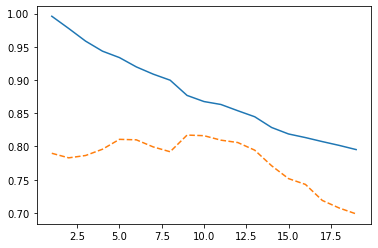

In [ ]:
plt.plot(para_leaf, train_score, linestyle='-', label='Train score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test score')

## train_score와 test_score의 값을 서로 고려하며 leaf node의 최소 자료 수를 5로 지정한다.

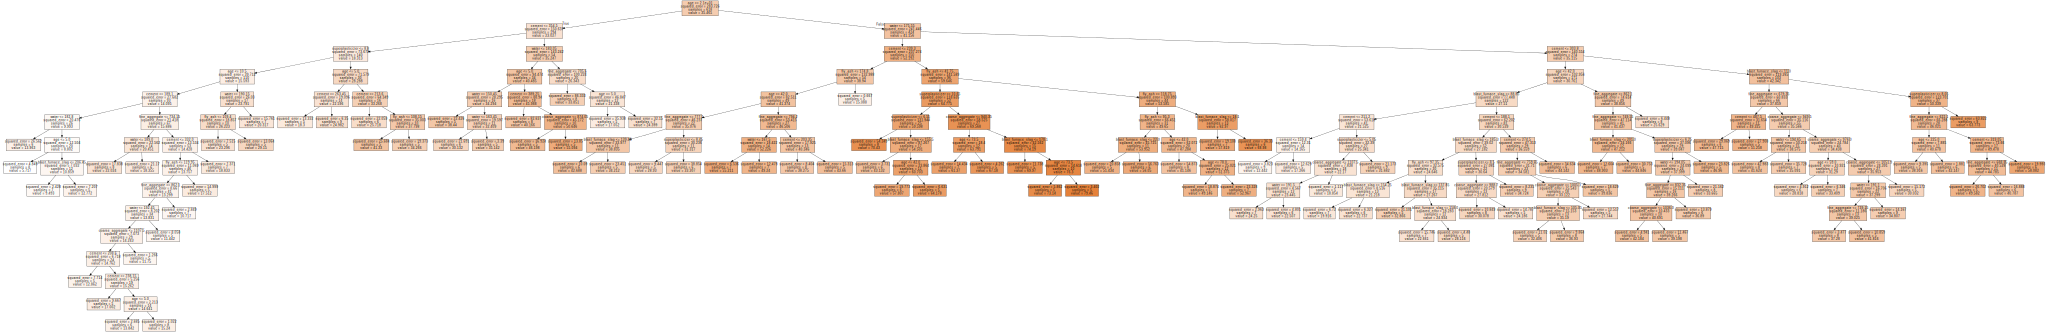

In [ ]:
#변수명 저장
v_feature_name = df_train_x.columns

#입사귀 노드 최소 자료수: 5개
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5)
tree_graph.fit(df_train_x, df_train_y)

#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일로 모델 생성
export_graphviz(tree_graph, out_file="tree_leaf_concrete.dot",
              feature_names=v_feature_name, impurity=True, filled=True)

#위에서 생성된 tree_leaf_concrete.dot 파일을 graphviz로 읽어 시각화
with open("tree_leaf_concrete.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
#2. Parameter 조정 - min_samples_split
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5,
                                min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

#모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.934,0.811
1,6,0.934,0.811
2,8,0.934,0.811
3,10,0.934,0.811
4,12,0.926,0.822
5,14,0.919,0.815
6,16,0.915,0.794
7,18,0.898,0.794
8,20,0.894,0.798
9,22,0.886,0.798


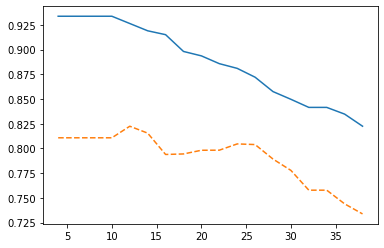

In [ ]:
plt.plot(para_split, train_score, linestyle='-', label='Train score')
plt.plot(para_split, test_score, linestyle='--', label='Test score')

## train_score와 test_score의 값을 서로 고려하며 분리 노드의 최소 자료 수를 12로 지정한다.

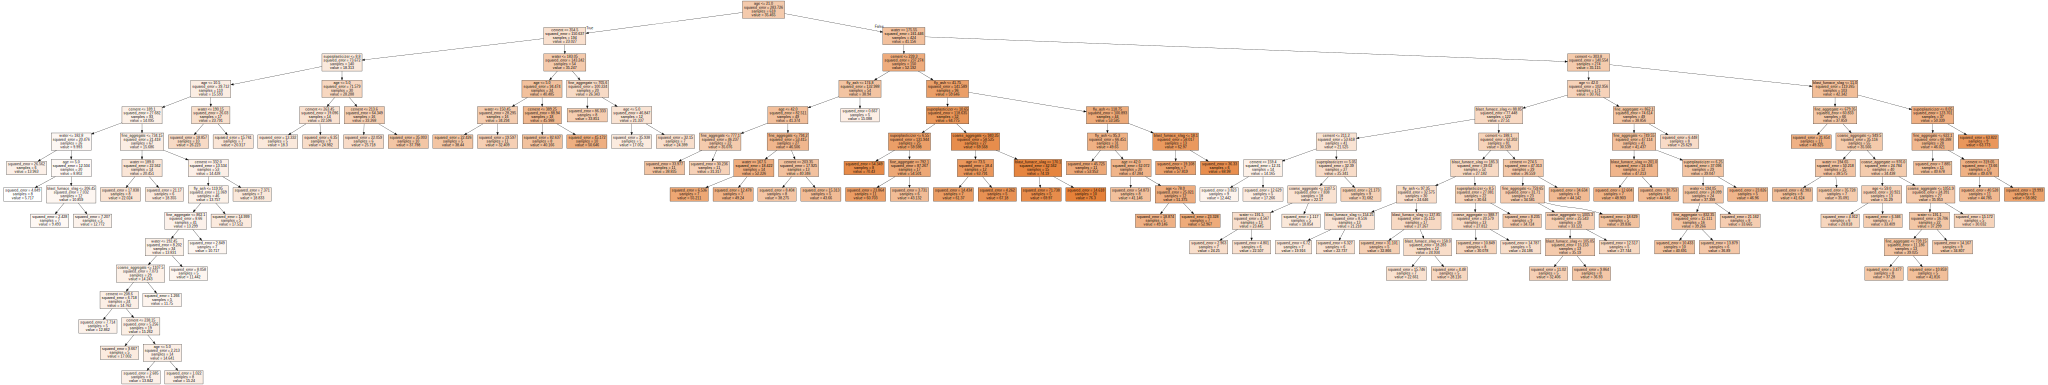

In [ ]:
#분리 노드의 최소 자료수: 12개
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, \
                                  min_samples_split=12)
tree_graph.fit(df_train_x, df_train_y)

#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일로 모델 생성
export_graphviz(tree_graph, out_file="tree_split_concrete.dot",
              feature_names=v_feature_name, impurity=True, filled=True)

#위에서 생성된 tree_split_concrete.dot 파일을 graphviz로 읽어 시각화
with open("tree_split_concrete.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
#2. Parameter 조정 - max_depth
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5,\
                                min_samples_split=12, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
#결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

#모델 설명력 확인
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.249,0.243
1,2,0.474,0.406
2,3,0.644,0.567
3,4,0.749,0.671
4,5,0.832,0.734
5,6,0.881,0.794
6,7,0.912,0.815
7,8,0.920,0.815
8,9,0.925,0.812
9,10,0.926,0.812


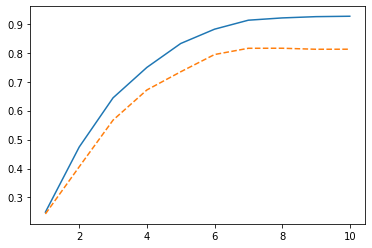

In [ ]:
plt.plot(para_depth, train_score, linestyle='-', label='Train score')
plt.plot(para_depth, test_score, linestyle='--', label='Test score')

## train_score와 test_score의 값을 서로 고려하며 최대 깊이를 7로 지정한다.

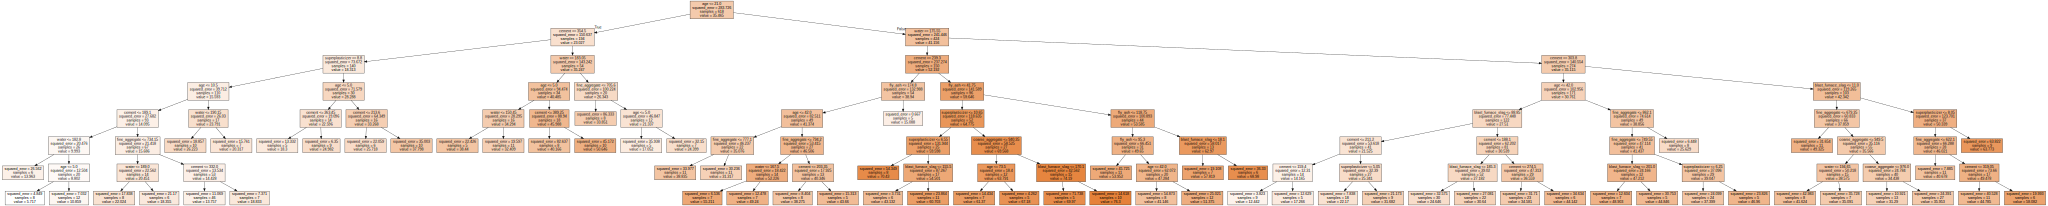

In [ ]:
#최대 깊이 7
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, \
                                  min_samples_split=12, max_depth=7)
tree_graph.fit(df_train_x, df_train_y)

#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일로 모델 생성
export_graphviz(tree_graph, out_file="tree_depth_concrete.dot",
              feature_names=v_feature_name, impurity=True, filled=True)

#위에서 생성된 tree_depth_concrete.dot 파일을 graphviz로 읽어 시각화
with open("tree_depth_concrete.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
#3. 최종 모델 선정
tree_final = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=12, max_depth=7)
tree_graph.fit(df_train_x, df_train_y)
tree_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))


Score on training set: 0.912
Score on test set: 0.815


In [ ]:
#4. 결론 도출 - 설명변수의 중요도 결과
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,age,0.338
0,cement,0.254
3,water,0.197
4,superplasticizer,0.060
1,blast_furnace_slag,0.051
2,fly_ash,0.050
6,fine_aggregate,0.043
5,coarse_aggregate,0.007


Text(0, 0.5, 'Feature')

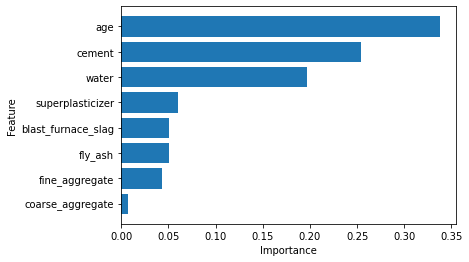

In [ ]:
#4. 결론 도출 - 설명변수 중요도 그래프
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Importance")
plt.ylabel("Feature")

## 결론: 중요 설명변수는 age, cememt, water 순으로 목표 변수 strength에 영향이 크다고 볼 수 있다. 

# 문제 2. 랜덤 포레스트_예측

In [ ]:
#1.기본 옵션으로 모델 생성
rf_uncustomized= RandomForestRegressor(random_state=1234)

In [ ]:
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score training set: 0.980
Score test set: 0.904


In [ ]:
#2. Parameter 조정 - n_estimators
train_score = []
test_score = []

para_n_tree = [n_tree * 1 for n_tree in range(1,101)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

#모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.885,0.733
1,2,0.926,0.787
2,3,0.948,0.845
3,4,0.960,0.872
4,5,0.962,0.884
...,...,...,...
95,96,0.980,0.905
96,97,0.980,0.905
97,98,0.980,0.905
98,99,0.980,0.904


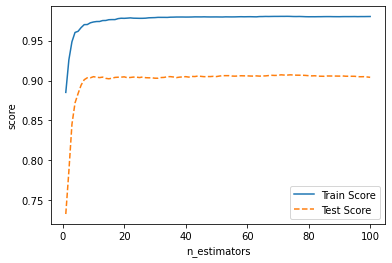

In [ ]:
#모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

## train_score와 test_score의 값을 서로 고려하며 트리 수를 20개로 지정한다.

In [ ]:
#2. Parameter 조정 - min_samples_leaf
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=20, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.978,0.905
1,2,0.964,0.898
2,3,0.950,0.888
3,4,0.937,0.874
4,5,0.922,0.868
5,6,0.910,0.857
6,7,0.900,0.849
7,8,0.892,0.845
8,9,0.883,0.836
9,10,0.873,0.823


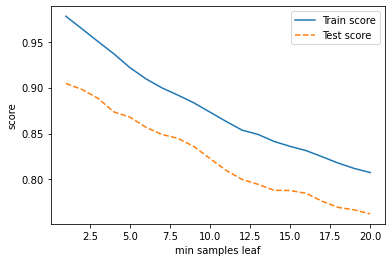

In [ ]:
plt.plot(para_leaf, train_score, linestyle='-', label='Train score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test score')
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

## train_score와 test_score의 값을 서로 고려하며 leaf node의 최소 자료 수를 3개로 지정한다.

In [ ]:
#2. Parameter 조정 - min_samples_split
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=20, min_samples_leaf=3, \
                              min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

#모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.950,0.888
1,6,0.950,0.888
2,8,0.945,0.884
3,10,0.936,0.876
4,12,0.929,0.875
5,14,0.921,0.868
6,16,0.912,0.863
7,18,0.906,0.856
8,20,0.897,0.845
9,22,0.891,0.837


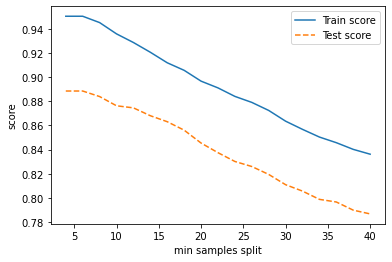

In [ ]:
plt.plot(para_split, train_score, linestyle='-', label='Train score')
plt.plot(para_split, test_score, linestyle='--', label='Test score')
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

## train_score와 test_score의 값을 서로 고려하며 분리 노드의 최소 자료 수를 7개로 지정한다.

In [ ]:
#train 및 test 설명력 결과 저장
train_score = []
test_score = []
    
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RFR(random_state=1234, n_estimators=100, 
            min_samples_leaf=6, min_samples_split=14, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

#모델 설명력 확인
df_score_depth.round(3)
